In [9]:
import pandas as pd
import os
raw_data_path = r"C:\Users\ASUS\OneDrive\Documents\RegresiProject\data\raw\dataset_pengangguran_indonesia.csv"
df = pd.read_csv(raw_data_path)
print('Informasi dataset:')
df.info()
print('\nDeskripsi statistik dataset:')
df.describe()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Periode                     35 non-null     int64 
 1   Bulan                       35 non-null     object
 2   Tidak/belum pernah sekolah  35 non-null     int64 
 3   Tidak/belum tamat SD        35 non-null     int64 
 4   SD                          35 non-null     int64 
 5   SLTP                        35 non-null     int64 
 6   SLTA Umum/SMU               35 non-null     int64 
 7   SLTA Kejuruan/SMK           35 non-null     int64 
 8   Akademi/Diploma             35 non-null     int64 
 9   Universitas                 35 non-null     int64 
 10  Total                       35 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB

Deskripsi statistik dataset:


,Periode,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2014.228571,83398.457143,496154.714286,1.462738e+06,1.697168e+06,2.153685e+06,1.422718e+06,290182.771429,642869.171429,8.247912e+06
std,5.082182,53949.291460,105794.400661,5.112940e+05,4.367373e+05,3.518458e+05,3.361657e+05,103575.191557,167112.979108,1.233931e+06
min,2006.000000,15206.000000,328781.000000,8.657780e+05,1.137195e+06,1.546699e+06,8.473650e+05,159490.000000,375601.000000,6.898796e+06
25%,2010.000000,38596.500000,422384.000000,1.219224e+06,1.343867e+06,1.902169e+06,1.184779e+06,219345.000000,548211.000000,7.125746e+06
50%,2014.000000,79764.000000,489152.000000,1.320392e+06,1.650387e+06,2.133627e+06,1.383022e+06,254457.000000,626621.000000,8.319779e+06
75%,2018.500000,107820.500000,579941.000000,1.487256e+06,1.828030e+06,2.437820e+06,1.595546e+06,317788.500000,743362.000000,9.032334e+06
max,2022.000000,234465.000000,737610.000000,2.753548e+06,2.860007e+06,2.851518e+06,2.326599e+06,538186.000000,999543.000000,1.110469e+07


In [10]:
# Hitung Korelasi antar fitur
import numpy as np
corr = df.corr(numeric_only=True)
print('\nKorelasi antar fitur/kolom:')
corr


Korelasi antar fitur/kolom:


,Periode,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
Periode,1.000000,-0.753575,-0.295727,-0.761764,-0.795871,-0.338482,0.639666,-0.600352,0.643655,-0.541565
Tidak/belum pernah sekolah,-0.753575,1.000000,0.599636,0.563539,0.721903,0.251626,-0.670081,0.181119,-0.705387,0.393336
Tidak/belum tamat SD,-0.295727,0.599636,1.000000,0.269554,0.422759,0.233251,-0.499804,0.010310,-0.434581,0.246359
SD,-0.761764,0.563539,0.269554,1.000000,0.932508,0.625806,-0.292749,0.430806,-0.483832,0.862400
SLTP,-0.795871,0.721903,0.422759,0.932508,1.000000,0.690942,-0.384129,0.367839,-0.573282,0.854556
SLTA Umum/SMU,-0.338482,0.251626,0.233251,0.625806,0.690942,1.000000,0.248419,0.230567,-0.081043,0.896637
SLTA Kejuruan/SMK,0.639666,-0.670081,-0.499804,-0.292749,-0.384129,0.248419,1.000000,-0.178796,0.760535,0.101356
Akademi/Diploma,-0.600352,0.181119,0.010310,0.430806,0.367839,0.230567,-0.178796,1.000000,0.138840,0.437663
Universitas,0.643655,-0.705387,-0.434581,-0.483832,-0.573282,-0.081043,0.760535,0.138840,1.000000,-0.140196
Total,-0.541565,0.393336,0.246359,0.862400,0.854556,0.896637,0.101356,0.437663,-0.140196,1.000000


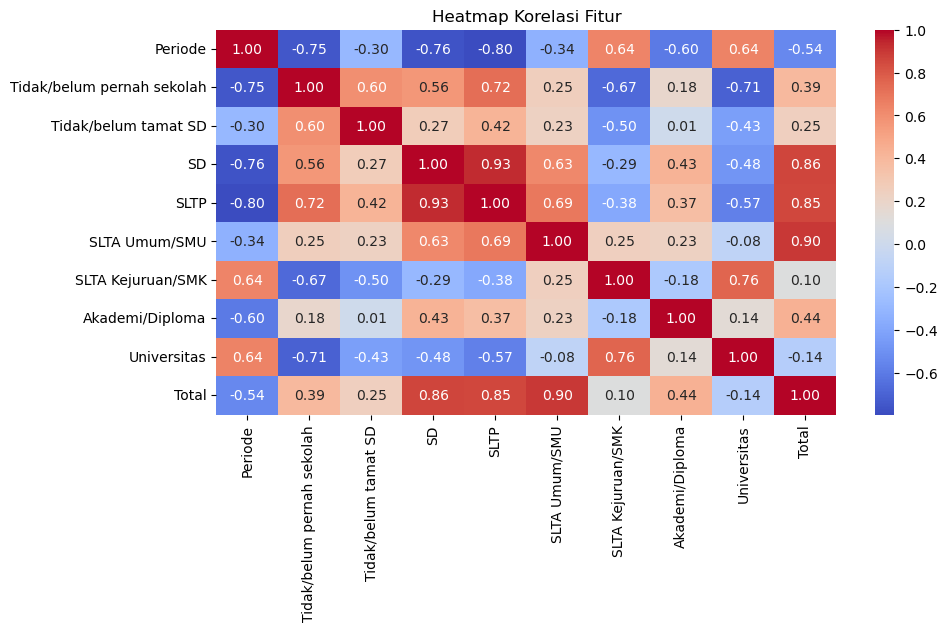

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [12]:
import locale
current_locale = locale.getlocale()
locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8')

'id_ID.UTF-8'

In [13]:
try:
    df['Tanggal_Gabungan'] = df['Periode'].astype(str) + ' '+ df['Bulan'] # Gabungkan fitur periode&bulan menjadi fitur tanggal (tipe str)
    df['Tanggal_Gabungan'] = pd.to_datetime(df['Tanggal_Gabungan'], format='%Y %B') # Ubah tipe str ke datetime
finally:
    locale.setlocale(locale.LC_ALL, current_locale) # Kembalikan locale semula
print(df[['Periode', 'Bulan', 'Tanggal_Gabungan']].head())

   Periode     Bulan Tanggal_Gabungan
0     2006  Februari       2006-02-01
1     2006   Agustus       2006-08-01
2     2007  Februari       2007-02-01
3     2007   Agustus       2007-08-01
4     2008  Februari       2008-02-01


In [14]:
# buat variabel baru yang menyimpan dataframe tanpa ada kolom Periode dan Bulan
df_date = df.drop(columns=['Periode', 'Bulan'])
df_date

,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total,Tanggal_Gabungan
0,234465,614960,2675459,2860007,2842876,1204140,297185,375601,11104693,2006-02-01
1,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000,2006-08-01
2,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917,2007-02-01
3,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142,2007-08-01
4,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590,2008-02-01
5,103206,443832,2099968,1973986,2403394,1409128,362683,598318,9394515,2008-08-01
6,60347,415955,2143747,2054682,2133627,1337586,486399,626621,9258964,2009-02-01
7,90471,547430,1531671,1770823,2472245,1407226,441100,701651,8962617,2009-08-01
8,59066,547164,1522465,1657452,2111256,1336881,538186,820020,8592490,2010-02-01
9,157586,600221,1402858,1661449,2149123,1195192,443222,710128,8319779,2010-08-01


Tren TPT dari Tahun ke Tahun (Secara Keseluruhan)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12180\3735537964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pengangguran.index, y=total_pengangguran.values, palette='viridis')


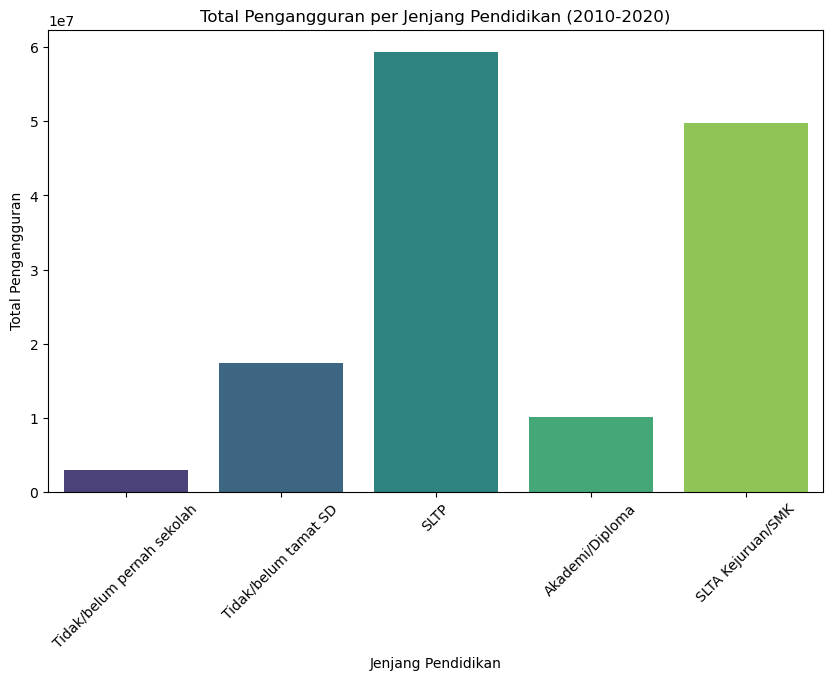

In [15]:
# Mencari tahu jenjang mana yang paling banyak menyumbang pengangguran.
import matplotlib.pyplot as plt
import seaborn as sns
total_pengangguran = df_date[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pengangguran.index, y=total_pengangguran.values, palette='viridis')
plt.title('Total Pengangguran per Jenjang Pendidikan (2010-2020)')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Total Pengangguran')
plt.xticks(rotation=45)
plt.show()



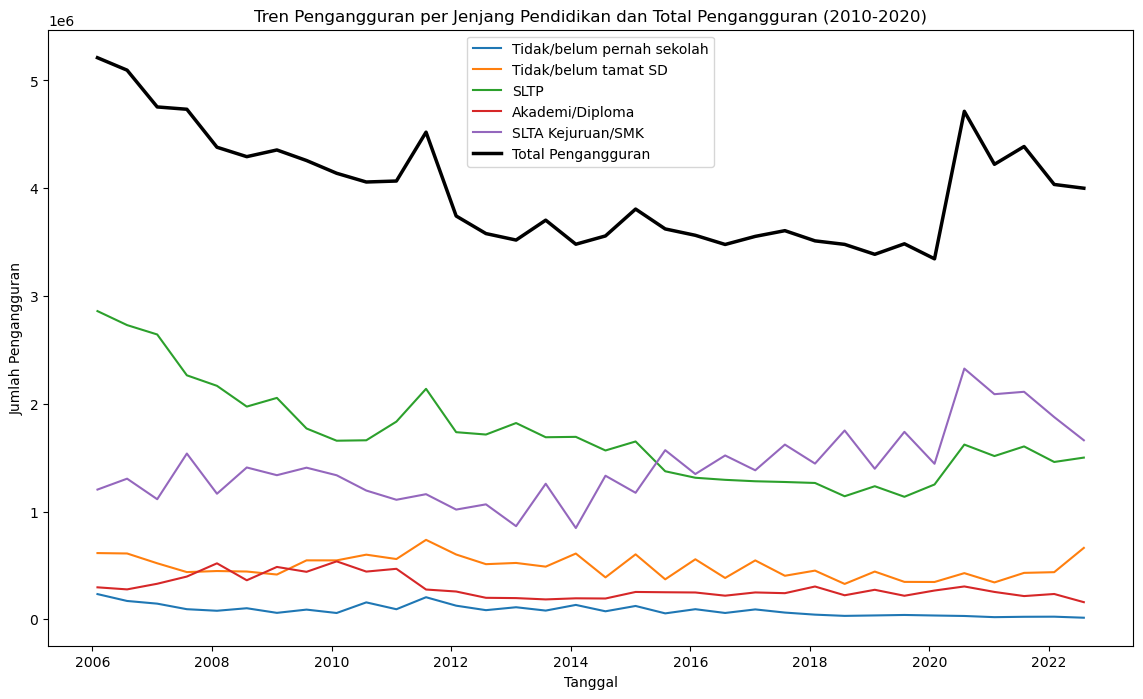

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
# Plot per jenjang pendidikan
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='Tidak/belum pernah sekolah', label='Tidak/belum pernah sekolah')
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='Tidak/belum tamat SD', label='Tidak/belum tamat SD')
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='SLTP', label='SLTP')
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='Akademi/Diploma', label='Akademi/Diploma')
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='SLTA Kejuruan/SMK', label='SLTA Kejuruan/SMK')
# Plot total pengangguran
df_date['Total_Pengangguran'] = df_date[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']].sum(axis=1)
sns.lineplot(data=df_date, x='Tanggal_Gabungan', y='Total_Pengangguran', label='Total Pengangguran', color='black', linewidth=2.5)
plt.title('Tren Pengangguran per Jenjang Pendidikan dan Total Pengangguran (2010-2020)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengangguran')
plt.legend()
plt.show()

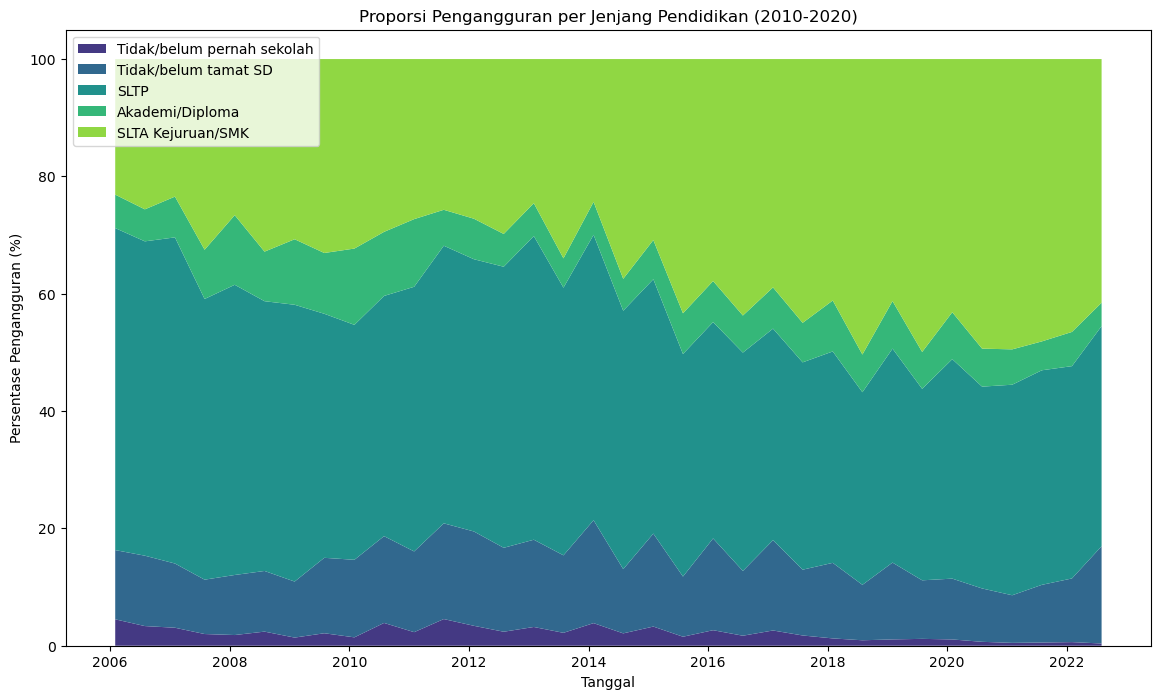

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
# Hitung persentase kontribusi tiap jenjang pendidikan terhadap Total per periode
df_date['Total_Pengangguran'] = df_date[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']].sum(axis=1)
df_prop = df_date.copy()
df_prop[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']] = df_prop[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']].div(df_prop['Total_Pengangguran'], axis=0) * 100
# Visualisasi stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(df_prop['Tanggal_Gabungan'],
              df_prop['Tidak/belum pernah sekolah'],
                df_prop['Tidak/belum tamat SD'],
                df_prop['SLTP'],
                df_prop['Akademi/Diploma'],
                df_prop['SLTA Kejuruan/SMK'],
                labels=['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK'],
                colors=sns.color_palette('viridis', 5))
plt.title('Proporsi Pengangguran per Jenjang Pendidikan (2010-2020)')
plt.xlabel('Tanggal')
plt.ylabel('Persentase Pengangguran (%)')
plt.legend(loc='upper left')
plt.show()


Korelasi antar jenjang pendidikan:


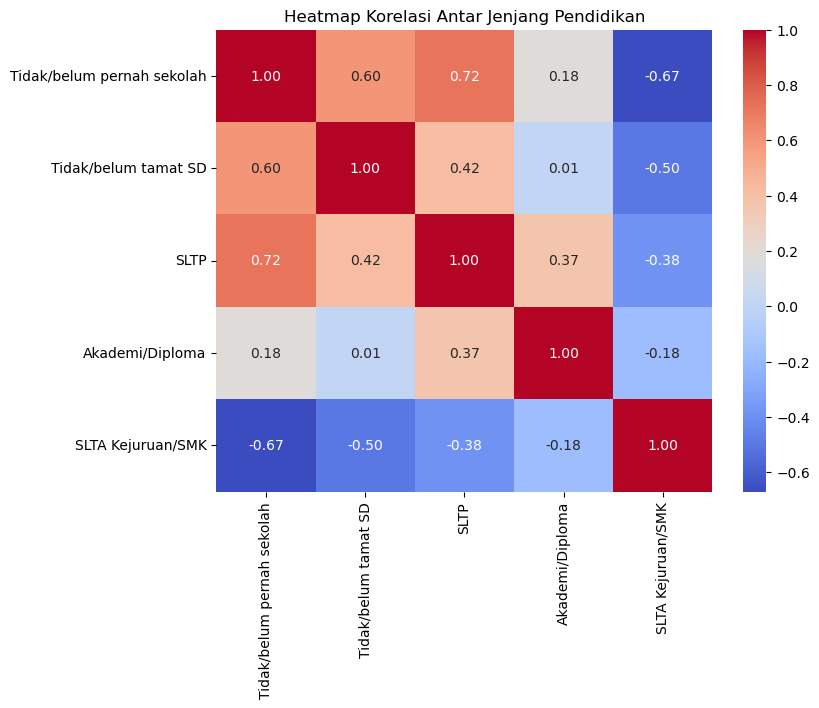

In [18]:
corr_jenjang = df_date[['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK']].corr()
print('\nKorelasi antar jenjang pendidikan:')
corr_jenjang
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_jenjang, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Jenjang Pendidikan')
plt.show()

       Februari  Agustus
Tahun                   
2006    5210757  5095229
2007    4754119  4732558
2008    4380263  4292835
2009    4354969  4257050
2010    4138749  4057670
2011    4066769  4520040
2012    3742245  3579228
2013    3519183  3703531
2014    3480440  3557324
2015    3806562  3622246
2016    3563215  3478183
2017    3553195  3606175
2018    3511571  3478961
2019    3386774  3484257
2020    3344996  4713570
2021    4221878  4387044
2022    4034912  8000240


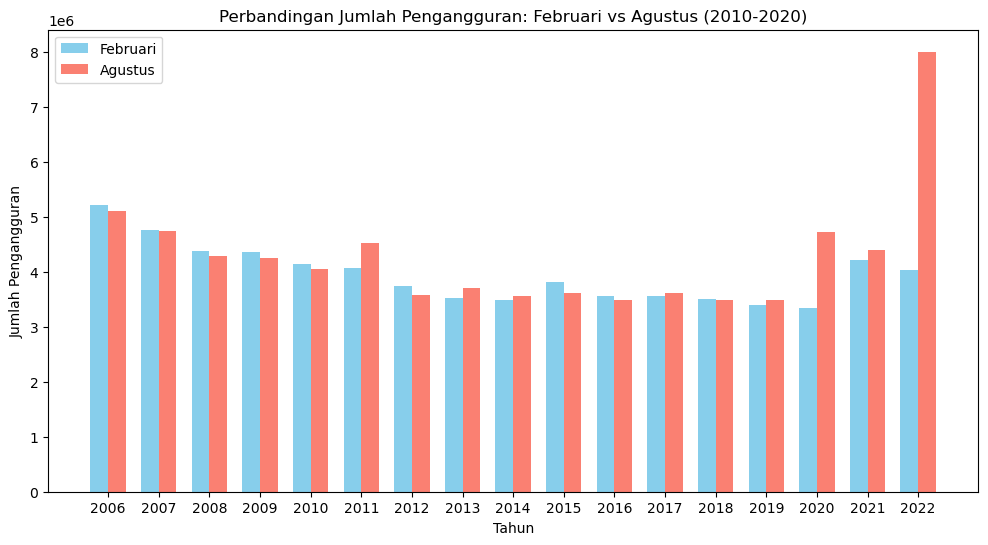

In [19]:
# Hitung rata-rata pengangguran per tahun di bulan Februari dan Agustus
df_feb = df_date[df_date['Tanggal_Gabungan'].dt.month == 2]
df_aug = df_date[df_date['Tanggal_Gabungan'].dt.month == 8]

# Agregasi data untuk memastikan tidak ada duplikat indeks (tahun)
# Gunakan .sum() atau .mean() tergantung kebutuhan
df_feb_agg = df_feb.groupby(df_feb['Tanggal_Gabungan'].dt.year)['Total_Pengangguran'].sum()
df_aug_agg = df_aug.groupby(df_aug['Tanggal_Gabungan'].dt.year)['Total_Pengangguran'].sum()

# Gabungkan data yang sudah diagregasi
df_compare = pd.DataFrame({
    'Februari': df_feb_agg,
    'Agustus': df_aug_agg
})
df_compare.index.name = 'Tahun'
df_compare = df_compare.dropna()
print(df_compare)

import matplotlib.pyplot as plt
import numpy as np
labels = df_compare.index.astype(int).tolist()
feb_values = df_compare['Februari'].values
aug_values = df_compare['Agustus'].values
x = np.arange(len(labels))  
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, feb_values, width, label='Februari', color='skyblue')
bars2 = ax.bar(x + width/2, aug_values, width, label='Agustus', color='salmon')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Pengangguran')
ax.set_title('Perbandingan Jumlah Pengangguran: Februari vs Agustus (2010-2020)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

 Feature Selection
 Berdasarkan hasil EDA, fitur yang akan dipilih untuk model prediksi adalah:
 - Tanggal_Gabungan (sebagai fitur waktu)
 - Jenjang pendidikan yang memiliki korelasi tinggi dengan total pengangguran:
   - Tidak/belum tamat SD
   - SLTP
   - SLTA Kejuruan/SMK
 Fitur target (target variable):
 - Total_Pengangguran

In [22]:
selected_features = df_date[['Tanggal_Gabungan', 'Tidak/belum tamat SD', 'SLTP', 'SLTA Kejuruan/SMK', 'Total_Pengangguran'  ]]
selected_features.head(5)

,Tanggal_Gabungan,Tidak/belum tamat SD,SLTP,SLTA Kejuruan/SMK,Total_Pengangguran
0,2006-02-01,614960,2860007,1204140,5210757
1,2006-08-01,611254,2730045,1305190,5095229
2,2007-02-01,520316,2643062,1114675,4754119
3,2007-08-01,438519,2264198,1538349,4732558
4,2008-02-01,448431,2166619,1165582,4380263


In [23]:
# Simpan hasil EDA dan feature selection ke file CSV di folder processed
processed_data_path = r"C:\Users\ASUS\OneDrive\Documents\RegresiProject\data\processed\selected_features.csv"
os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)
selected_features.to_csv(processed_data_path, index=False)
print(f'Hasil EDA dan feature selection disimpan di: {processed_data_path}')

Hasil EDA dan feature selection disimpan di: C:\Users\ASUS\OneDrive\Documents\RegresiProject\data\processed\selected_features.csv
